The purpose of this notebook is to demonstrate the capability and usage of the SVD in separating signal from noise. It is structured to follow my blog post at http://www.tschomay.com/2017/10/09/SVD_Introduction.html

I focus on additive noise, which is the case where multiple non-interacting signals and noise sources are all part of the measured signal. 

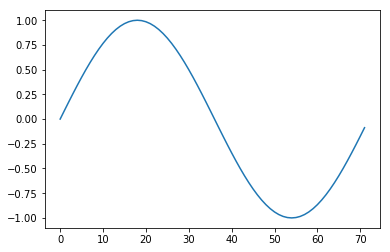

In [1]:
# Set Jupyter to show plots inline
%matplotlib inline

# Import packages
import numpy as np
import matplotlib.pyplot as plt

# Create data
# We'll start by just creating a single, simple sine function
# We evaluate the sine every 5 degrees for a full period
signal = np.sin(np.array(range(0, 360, 5)) * np.pi / 180.)
plt.plot(signal)

In [2]:
# 1.
# Now let's make a matrix of multiple observations of this same pattern
# Here we have 20 observations (columns) of the same signal. Each column contains the same sine pattern.
data = np.transpose(np.array([signal for i in range(20)]))

# Now use the SVD to find basis vectors for this dataset. This will find the patterns that capture most of the data.
u, s, v = np.linalg.svd(data)

<function matplotlib.pyplot.show>

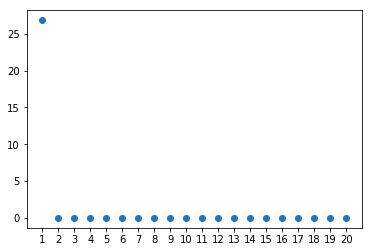

In [3]:
# The diagonal matrix s of singular values shows how prominent each pattern is in the data.
# Let's plot it to see how many patterns we need to capture the data
plt.scatter(range(len(s)), s)
plt.xticks(range(len(s)), [x + 1 for x in range(len(s))])
plt.show

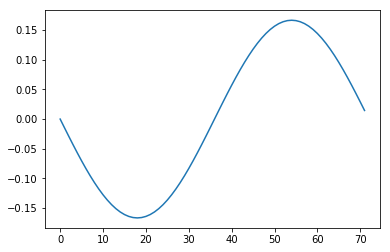

In [4]:
# So the first pattern captures the data completely.
# Next, let's look at the left basis vectors to see what pattern describes the columns completely.
# Plot the first column of u
plt.plot(u[:, 0])

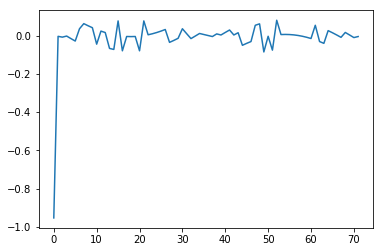

In [5]:
# It's a sine wave! But wait, it's upside down. This is because the SVD does not determine the
# signs of the basis vectors. So we recovered the original observation. Just to check, let's
# look at the next basis vector.
plt.plot(u[:, 1])

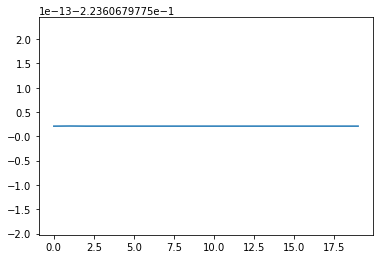

In [6]:
# As expected, this pattern is non-informative. Now let's look at the corresponding right basis vector,
# or pattern across the rows.
plt.plot(v[0])

<function matplotlib.pyplot.show>

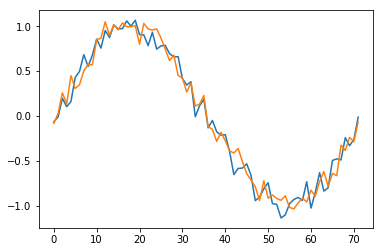

In [7]:
# Here it is flat. This shows that there is no varation between the columns.
# 
# 2.
# Next, let's add separate noise to each observation. As a first case, add 
# normally distributed noise with mean 0 and standard deviation 0.1.
mu = 0
sigma = 0.1
noise = np.random.normal(mu, sigma, data.shape)

# Add to data
data_noisy = data + noise

# Have a look at the first two noisy observations
plt.plot(data_noisy[:,0])
plt.plot(data_noisy[:,1])
plt.show

In [8]:
# Now run SVD on the noisy data
u, s, v = np.linalg.svd(data_noisy)

<function matplotlib.pyplot.show>

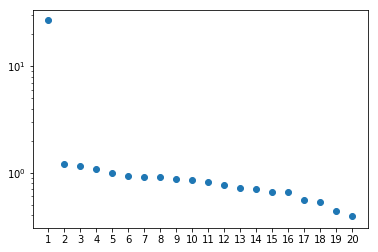

In [9]:
# This time we will plot the singular values on a log scale because we expect most of them
# to be small, but not zero.
plt.scatter(range(len(s)), s)
plt.xticks(range(len(s)), [x + 1 for x in range(len(s))])
plt.gca().set_yscale('log')
plt.show

<function matplotlib.pyplot.show>

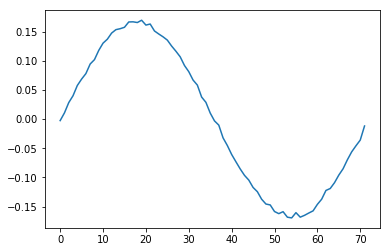

In [10]:
# Now let's check the first basis vector across the rows. This should be
# our sine wave with most of the noise filtered out.
plt.plot(u[:,0])
plt.show

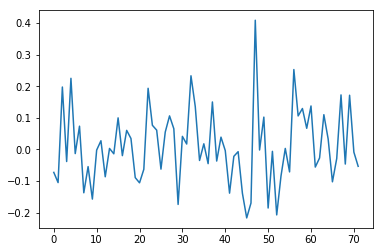

In [11]:
# The remaining patterns should capture the noise. Let's look at the second one.
plt.plot(u[:,1])

<function matplotlib.pyplot.show>

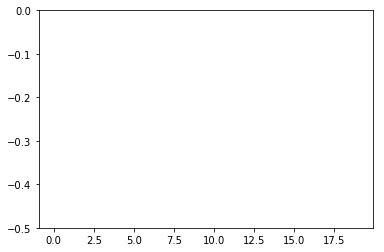

In [12]:
# The first RBV is still essentially flat with a little noise added.
plt.plot(v[0])
plt.ylim([-0.5, 0])
plt.show

<function matplotlib.pyplot.show>

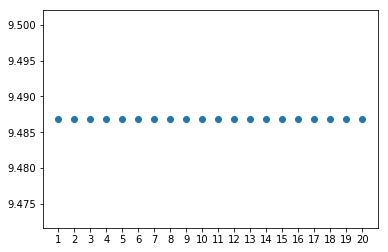

In [16]:
# 3.
# Instead of noise, what if we modify the signal observed?
# If, on the other hand, we use orthogonal functions as columns
data_scaled = np.transpose([np.sin(n * np.array(range(0, 360, 2)) * np.pi / 180.) for n in range(1, 21)])
u, s, v = np.linalg.svd(data_scaled)
plt.scatter(range(len(s)), s)
plt.xticks(range(len(s)), [x + 1 for x in range(len(s))])
plt.show

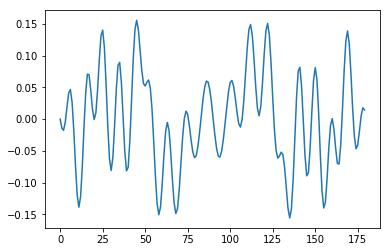

In [17]:
# Here we see that all singular values have the same value. I.e., we need all singular vectors to
# describe the data.
# Therefore one SVD would be the original matrix multiplied by two identities. However this
# is degenerate because all the singular values are equal. So the singular vectors can be any
# sets of orthogonal vectors that span the space of the original matrix.
plt.plot(u[:,0])

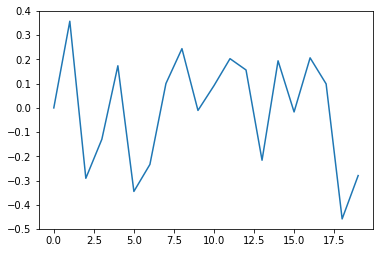

In [18]:
plt.plot(v[0])

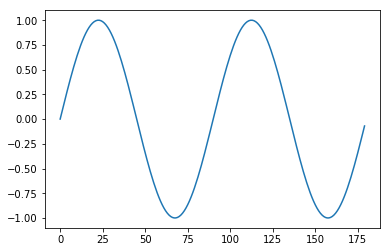

In [19]:
plt.plot(data_scaled[:,1])

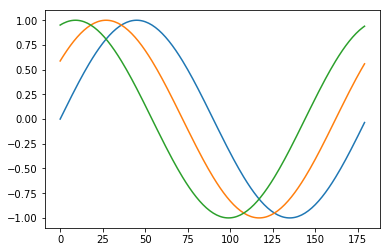

In [22]:
# We can see the same thing phase shifting the sine waves
data_shifted = np.transpose([np.sin((n*np.pi/20) + (np.array(range(0, 360, 2))*np.pi/180.)) for n in range(0, 21)])
plt.plot(data_shifted[:,0])
plt.plot(data_shifted[:,4])
plt.plot(data_shifted[:,8])

<function matplotlib.pyplot.show>

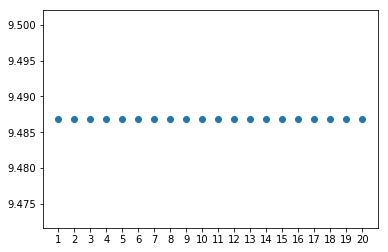

In [23]:
u, s, v = np.linalg.svd(data_scaled, full_matrices=0)
plt.scatter(range(len(s)), s)
plt.xticks(range(len(s)), [x + 1 for x in range(len(s))])
plt.show

<function matplotlib.pyplot.show>

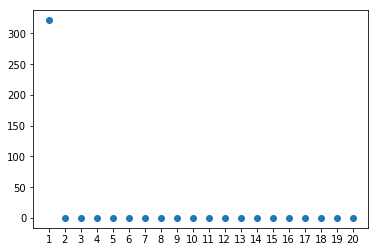

In [13]:
# 4.
# Next we'll look at what happens if there are patterns in both dimensions. For
# example, this could arise in situations where a signal is measured over time.
# Start by scaling the amplitude of each column of the data by a different
# amount.
data_scaled = np.transpose([n * signal for n in range(1, 21)])
u, s, v = np.linalg.svd(data_scaled)
plt.scatter(range(len(s)), s)
plt.xticks(range(len(s)), [x + 1 for x in range(len(s))])
plt.show

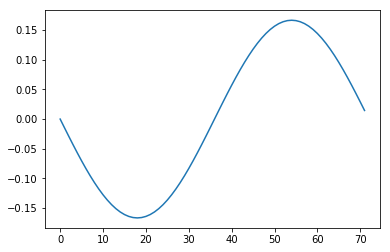

In [14]:
# Here, again, all the information is captured in the first basis vector. Everything else
# is just a scaling of this.
plt.plot(u[:,0])

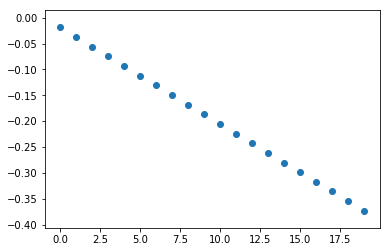

In [15]:
plt.scatter(range(len(s)),v[0])

<function matplotlib.pyplot.show>

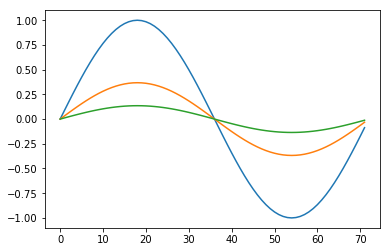

In [52]:
# A second example is of sine waves with exponential decay over time.
time_signal = np.exp([-x for x in range(20)])
data_dynamic = np.outer(signal, time_signal)
plt.plot(data_dynamic[:,0])
plt.plot(data_dynamic[:,1])
plt.plot(data_dynamic[:,2])
plt.show

<function matplotlib.pyplot.show>

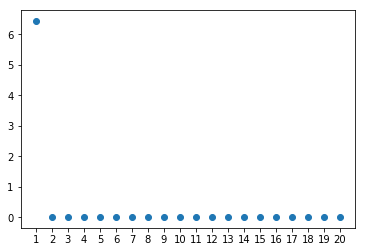

In [53]:
# Computing the SVD
u, s, v = np.linalg.svd(data_dynamic)
plt.scatter(range(len(s)), s)
plt.xticks(range(len(s)), [x + 1 for x in range(len(s))])
plt.show

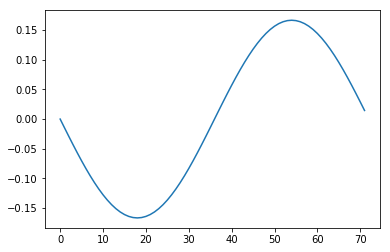

In [54]:
# Here again the data is rank 1 so all the information is captured by the first singular value.
plt.plot(u[:,0])

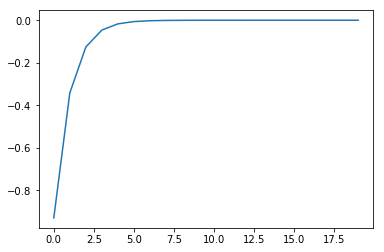

In [55]:
# And the corresponding right basis vector
plt.plot(v[0])

In [81]:
# 5.
# Two time-varying signals plus noise
# Generate a second signal that is quadratic. Scale it to similar size of the
# first signal so the results are easier to see.
signal_2 = [((x-180)/10)**2 for x in range(0, 360, 5)]
signal_2 = signal_2/np.max(signal_2)
# Generate a second time course. I decided to use a linear increase.
time_signal_2 = [x/20 for x in range(1, 21)]

In [85]:
# The second dataset is then the out product of the second signal and second
# time course.
data_dynamic_2 = np.outer(signal_2, time_signal_2)

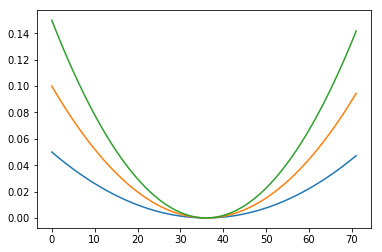

In [86]:
plt.plot(data_dynamic_2[:,0])
plt.plot(data_dynamic_2[:,1])
plt.plot(data_dynamic_2[:,2])

In [87]:
# Sum the two datasets and the noise matrix
complicated_data = data_dynamic + data_dynamic_2 + noise

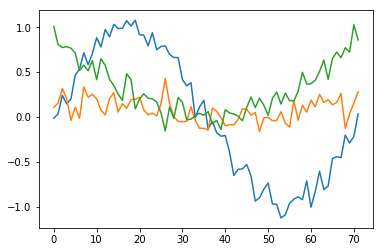

In [92]:
# Plot the first, fourth, and last columns to illustrate the signal.
plt.plot(complicated_data[:,0])
plt.plot(complicated_data[:,3])
plt.plot(complicated_data[:,19])

In [93]:
# Compute SVD and view the singular values
u, s, v = np.linalg.svd(complicated_data)

<function matplotlib.pyplot.show>

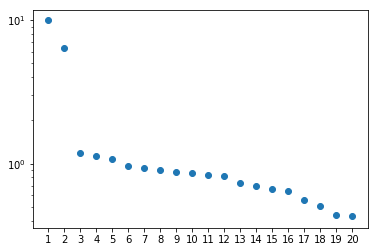

In [94]:
plt.scatter(range(len(s)), s)
plt.xticks(range(len(s)), [x + 1 for x in range(len(s))])
plt.gca().set_yscale('log')
plt.show

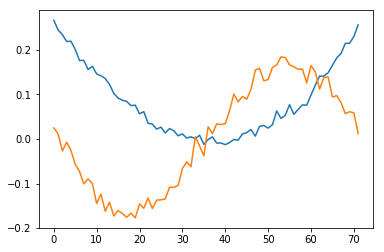

In [96]:
# Plot the first two left basis vectors
plt.plot(u[:,0])
plt.plot(u[:,1])

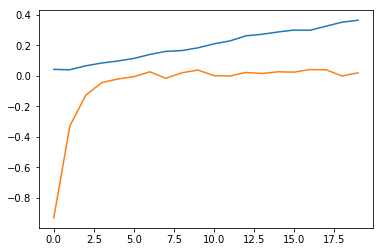

In [98]:
# Plot the first two right basis vectors
plt.plot(v[0])
plt.plot(v[1])